In [1]:
!pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.4 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


## **Import Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [3]:
dataset = pd.read_csv("/kaggle/input/mecfs-vs-depression-classification-dataset/me_cfs_vs_depression_dataset.csv")

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = dataset.shape

print("Jumlah ulasan:", jumlah_ulasan)
print("Jumlah kolom:", jumlah_kolom)

dataset.head()

Jumlah ulasan: 1000
Jumlah kolom: 16


,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


Output kode di atas memberikan informasi sebagai berikut:

* Terdapat **1.000 baris** dalam dataset.
* Terdapat **16 kolom** yaitu: **age**, **gender**, **sleep_quality_index**, **brain_fog_level**, **physical_pain_score**, **stress_level**, **depression_phq9_score**, **fatigue_severity_scale_score**, **pem_duration_hours**, **hours_of_sleep_per_night**, **pem_present**, **work_status**, **social_activity_level**, **exercise_frequency**, **meditation_or_mindfulness**, dan **diagnosis**.

## **Exploratory Data Analysis**

### **Deskripsi Variabel**

**Informasi data**

| Nama Fitur            | Keterangan                          |
|-----------------------|-------------------------------------|
| age                   | Usia pasien                         |
| gender                | Jenis kelamin (Male / Female / Other)|
| fatigue_severity_scale_score | Skala tingkat keparahan kelelahan (FSS) (skala 0–10) |
| depression_phq9_score | Skor depresi PHQ-9 (skala 0–27)     |
| pem_present           | Apakah ada Post-Exertional Malaise (PEM)? (Yes/No atau 1/0)|
| pem_duration_hours    | Lama durasi PEM dalam jam           |
| sleep_quality_index   | Kualitas tidur (skala 1–10)         |
| brain_fog_level       | Tingkat brain fog (skala 1–10)      |
| physical_pain_score   | Intensitas nyeri tubuh yang dirasakan pasien (skala 1–10) |
| stress_level          | Tingkat stres (skala 1–10)          |
| work_status           | Status pekerjaan pasien (Working / Partially working / Not working) |
| social_activity_level | Tingkat keterlibatan dalam aktifitas sosial (Very low – Very high) |
| exercise_frequency    | Frekuensi berolahraga (Never – Daily) |
| meditation_or_mindfulness| Apakah pasien sering melakukan praktek kesadaran diri/meditasi? Yes/No |
| hours_of_sleep_per_night | Rata-rata jam tidur per malam    |
| diagnosis                | Diagnosis akhir pasien (ME/CFS, Depression, Both) |

In [4]:
# Menampilkan informasi
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

Dari output terlihat bahwa:

* Terdapat 6 kolom dengan tipe object, yaitu: gender, work_status, social_activity_level, exercise_frequency, meditation_or_mindfulness, dan diagnosis. Kolom ini merupakan categorical features (fitur non-numerik).
* Terdapat 2 kolom numerik dengan tipe data int64, yaitu: age dan pem_present
* dan sisanya sebanyak 8 kolom numerik  bertipe data float64.

In [5]:
# Memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ", dataset.duplicated().sum())
dataset.describe()

Jumlah duplikasi:  0


,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


Dari output terlihat bahwa:
* Tidak terdapat duplikasi data pada dataset
* Rata-rata pasien berumur 44.39 tahun, dimana pasien termuda berusia 18 tahun dan tertua 70 tahun.
* Rata-rata pasien memiliki kualitas tidur menengah ke atas, yaitu 5.47.
* Mayoritas pasien mengalami tingkat brain fog di level sedang ke atas, yaitu 5.61. Hal ini sudah masuk area "mengganggu fungsi harian".
* Rata-rata intensitas nyeri fisik yang dirasakan pasien berada di level sedang ke atas, yaitu 5.52.
* Tingkat stres mayoritas pasien berada di level sedang ke atas, yaitu 5.46.
* Mayoritas pasien kemungkinan besar memiliki gejala depresi tingkat sedang.
* Rata-rata pasien mengalami kelelahan yang tinggi dan mengganggu fungsi sehari-hari.
* Rata-rata pasien mengalami crash setelah aktivitas fisik atau mental dan tidak bisa pulih hanya dengan istirahat singkat. Hal ini karena rata-rata durasi PEM yang dirasakan mencapai 23 jam.
* Rata-rata jam tidur pasien adalah 6.57, yang berarti peserta tidak mencapai durasi tidur yang optimal.
* 59% dari pasien mengalami Post-Exertional Malaise (PEM).

### **Menangani Missing Value**

In [6]:
# Mengecek missing value
dataset.isna().sum()

age                              0
gender                           0
sleep_quality_index             47
brain_fog_level                 48
physical_pain_score             34
stress_level                    48
depression_phq9_score           22
fatigue_severity_scale_score    21
pem_duration_hours              24
hours_of_sleep_per_night        21
pem_present                      0
work_status                     47
social_activity_level           40
exercise_frequency              39
meditation_or_mindfulness       11
diagnosis                        0
dtype: int64

Berdasarkan hasil output tersebut, terdapat 12 fitur yang memiliki missing value. Selain itu, dari pengamatan yang telah dilakukan, diketahui bahwa fitur depression_phq9_score dan pem_present memiliki keterkaitan yang berpotensi berkontribusi terhadap penentuan diagnosis. Oleh karena itu, akan dilakukan pengecekan pada kedua fitur.

In [7]:
# Menghitung jumlah diagnosis berdasarkan kolom depression_phq9_score
counts_dps = dataset.groupby('depression_phq9_score')['diagnosis'].value_counts()
counts_dps

depression_phq9_score  diagnosis 
0.0                    ME/CFS         10
1.0                    ME/CFS         16
2.0                    ME/CFS         12
3.0                    ME/CFS         17
4.0                    ME/CFS         11
5.0                    ME/CFS         19
6.0                    ME/CFS         13
7.0                    ME/CFS         12
8.0                    ME/CFS         10
9.0                    ME/CFS        269
10.0                   Depression    170
                       Both           66
11.0                   Depression     21
                       Both            6
12.0                   Depression     22
                       Both            5
13.0                   Both           13
                       Depression      6
14.0                   Depression     12
                       Both            5
15.0                   Depression      9
                       Both            5
16.0                   Depression     12
                       

In [8]:
# Menghitung jumlah diagnosis berdasarkan kolom pem_present
counts_pp = dataset.groupby('pem_present')['diagnosis'].value_counts()
counts_pp

pem_present  diagnosis 
0            Depression    401
1            ME/CFS        397
             Both          202
Name: count, dtype: int64

Berdasarkan output di atas, diketahui bahwa:
* Hasil diagnosis menunjukkan **depression** ketika nilai **depression_phq9_score >= 10** dan **pem_present = 0**
* Hasil diagnosis menunjukkan **ME/CFS** ketika nilai **depression_phq9_score < 10** dan **pem_present = 1**
* Hasil diagnosis menunjukkan **both** ketika nilai **depression_phq9_score >= 10** dan **pem_present = 1**

Dengan begitu, imputasi yang dilakukan pada fitur depression_phq9_score akan mempertimbangkan diagnosis logis diatas.

In [9]:
# Mengatasi missing value pada fitur depression_phq9_score
# Membuat mask berdasarkan diagnosis logis
mask_depression = (dataset['pem_present'] == 0) 
mask_mecfs = (dataset['pem_present'] == 1) & (dataset['depression_phq9_score'] < 10)
mask_both = (dataset['pem_present'] == 1) & (dataset['depression_phq9_score'] >= 10)

# Menghitung nilai median untuk setiap kelompok diagnosis logis
median_dep = dataset.loc[mask_depression, 'depression_phq9_score'].median()
median_mecfs = dataset.loc[mask_mecfs, 'depression_phq9_score'].median()
median_both = dataset.loc[mask_both, 'depression_phq9_score'].median()

# Membuat fungsi imputasi
def isi_phq9(row):
    if pd.isna(row['depression_phq9_score']):
        if row['pem_present'] == 0:
            return median_dep
        elif row['pem_present'] == 1:
            return median_mecfs 
            
    return row['depression_phq9_score']

# Menerapkan fungsi imputasi untuk mengisi nilai NaN pada kolom 'depression_phq9_score'
dataset['depression_phq9_score'] = dataset.apply(isi_phq9, axis=1)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         1000 non-null   float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

In [11]:
# Menghapus fitur lainnya yang mengandung missing value
dataset_clean = dataset.dropna()
print(f"Jumlah baris setelah dibersihkan: {len(dataset_clean)} dari {len(dataset)}")

Jumlah baris setelah dibersihkan: 683 dari 1000


In [12]:
# Menghitung proporsi fitur diagnosis sebelum missing value dihapus
dataset['diagnosis'].value_counts(normalize=True)

diagnosis
Depression    0.401
ME/CFS        0.397
Both          0.202
Name: proportion, dtype: float64

In [13]:
# Menghitung proporsi fitur diagnosis setelah missing value dihapus
dataset_clean['diagnosis'].value_counts(normalize=True)

diagnosis
Depression    0.402635
ME/CFS        0.387994
Both          0.209370
Name: proportion, dtype: float64

Dari output tersebut, diketahui bahwa perubahan yang terjadi berada di bawah 1%, menunjukkan bahwa penghapusan baris yang mengandung NaN tidak secara drastis mengganggu distribusi diagnosis.

In [14]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           683 non-null    int64  
 1   gender                        683 non-null    object 
 2   sleep_quality_index           683 non-null    float64
 3   brain_fog_level               683 non-null    float64
 4   physical_pain_score           683 non-null    float64
 5   stress_level                  683 non-null    float64
 6   depression_phq9_score         683 non-null    float64
 7   fatigue_severity_scale_score  683 non-null    float64
 8   pem_duration_hours            683 non-null    float64
 9   hours_of_sleep_per_night      683 non-null    float64
 10  pem_present                   683 non-null    int64  
 11  work_status                   683 non-null    object 
 12  social_activity_level         683 non-null    object 
 13  exercise_f

### **Menangani Outlier**

In [15]:
# Membagi fitur pada dataset menjadi dua bagian
numerical_features = ['age', 'sleep_quality_index', 'brain_fog_level', 'physical_pain_score', 'stress_level', 'depression_phq9_score', 
                      'fatigue_severity_scale_score', 'pem_duration_hours', 'hours_of_sleep_per_night', 'pem_present']
categorical_features = ['gender', 'work_status', 'social_activity_level', 'exercise_frequency', 
                        'meditation_or_mindfulness', 'diagnosis']

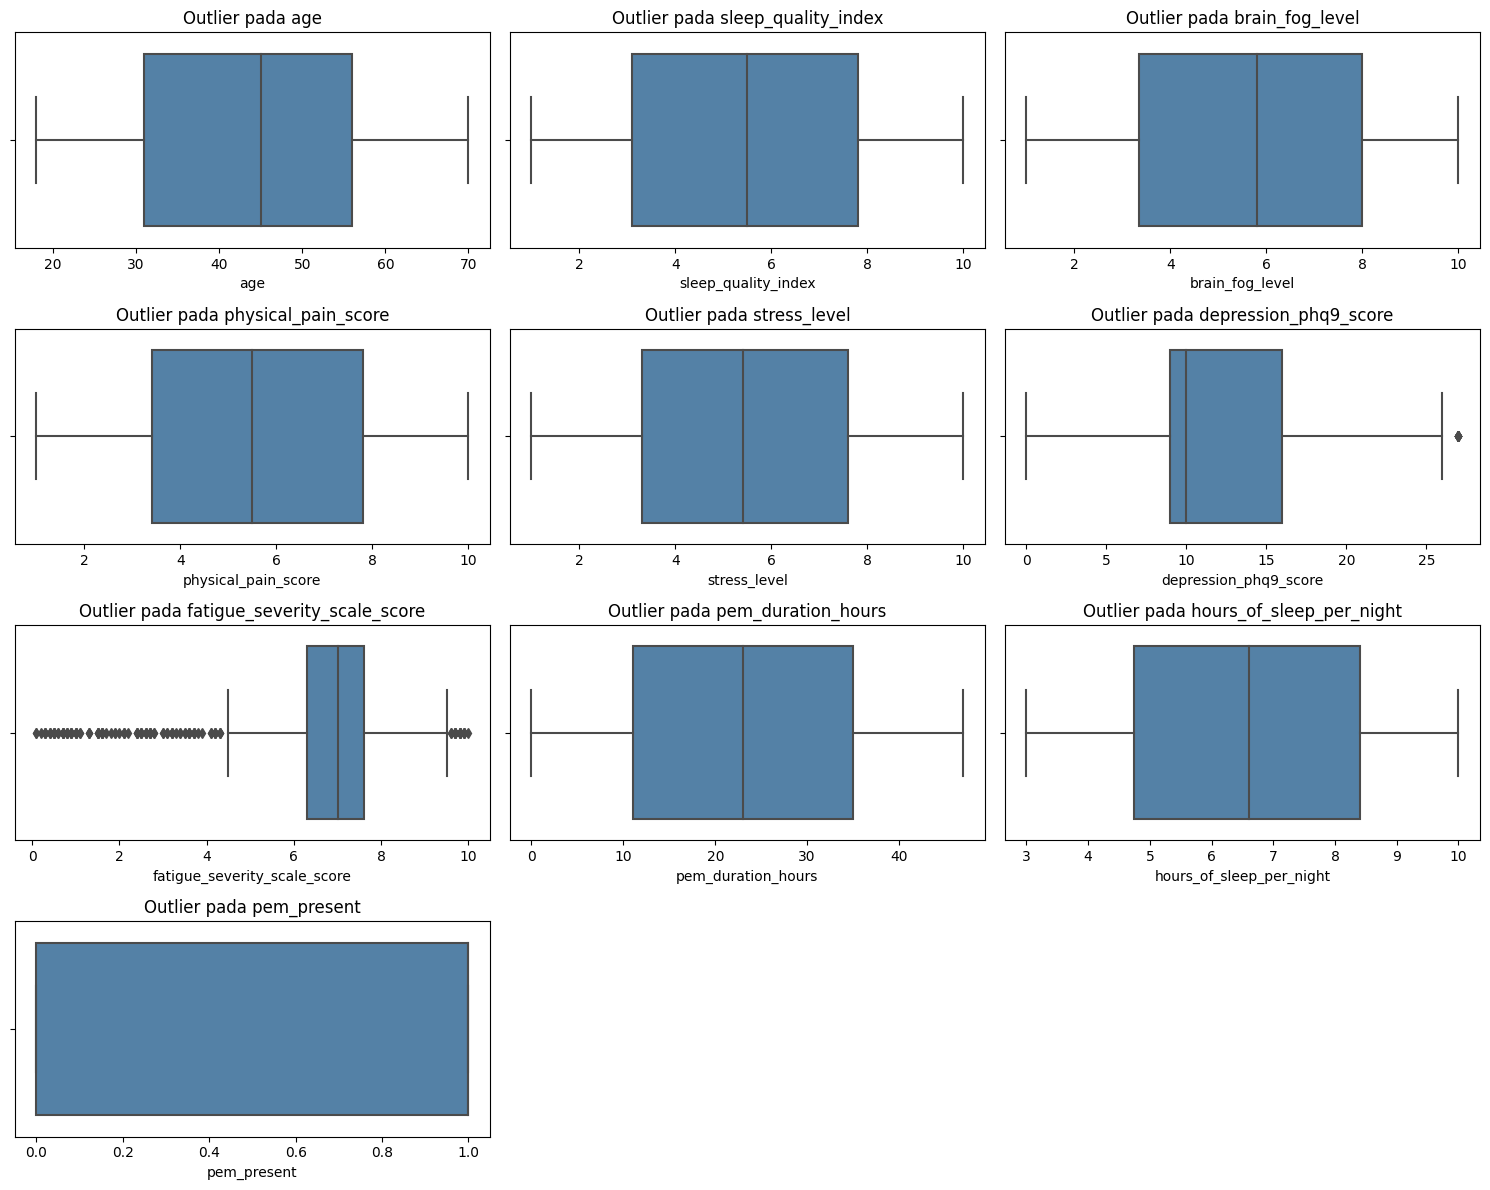

In [16]:
# Visualisasi dengan boxplot untuk mendeteksi outliers pada fitur numerik
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=dataset_clean[col], color='steelblue')
    plt.title(f'Outlier pada {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Berdasarkan hasil analisis terhadap fitur numerik, terdapat 2 fitur yang memiliki outlier, yaitu fitur **depression_phq9_score** dan **fatigue_severity_scale_score**. Meskipun demikian, tidak akan dilakukan penanganan terhadap outlier tersebut, mengingat outlier masih berada dalam range nilai yang diharapkan dari tiap fitur, yaitu **depression_phq9_score** dengan nilai antara **0 hingga 27** dan **fatigue_severity_scale_score** dengan nilai antara **0 hingga 10**.

### **Univariate Analysis**

* **Categorical Features**

        jumlah sampel  persentase
gender                           
Male              343        50.2
Female            340        49.8


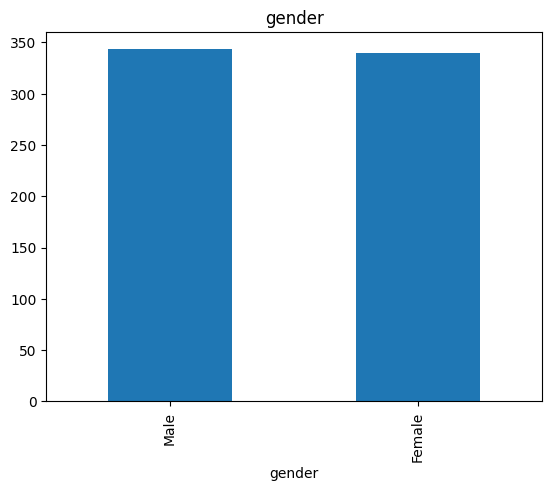

In [17]:
# Fitur gender
feature = categorical_features[0]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa dataset ini terdiri dari **343 pasien berjenis kelamin laki-laki (50.2%)** dan **340 pasien berjenis kelamin perempuan (49.8%)**. Hal ini menunjukkan bahwa distribusi gender pada dataset ini hampir seimbang, meskipun laki-laki sedikit lebih dominan.


                   jumlah sampel  persentase
work_status                                 
Partially working            250        36.6
Working                      228        33.4
Not working                  205        30.0


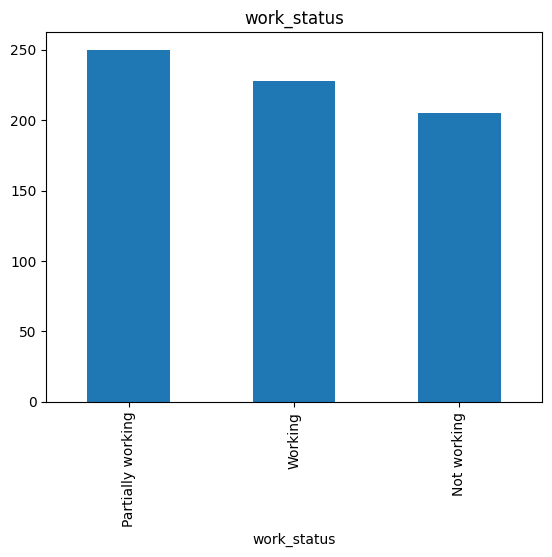

In [18]:
# Fitur work_status
feature = categorical_features[1]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa **36.6% pasien** masih bisa bekerja walaupun tidak secara penuh **(partially working)**, **33.4% pasien** bekerja secara penuh **(working)**, dan sisanya tidak bekerja sama sekali **(not working)**. 

                       jumlah sampel  persentase
social_activity_level                           
High                             145        21.2
Very low                         143        20.9
Low                              136        19.9
Very high                        132        19.3
Medium                           127        18.6


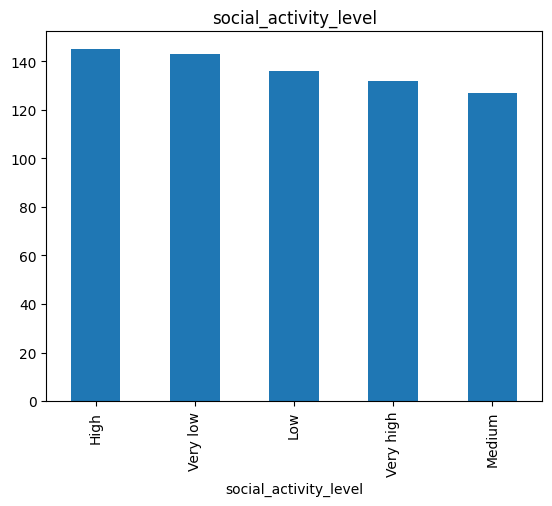

In [19]:
# Fitur social_activity_level
feature = categorical_features[2]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa:
* Terdapat **21.2% pasien** yang terlibat aktif mengikuti aktifitas sosial.
* Terdapat **40.8% (very low + low) pasien** yang cukup banyak mengalami penarikan sosial ekstrem atau keterlibatan sosial yang rendah. 
* Terdapat **19.3% pasien** yang sangat aktif bersosialisasi.

                    jumlah sampel  persentase
exercise_frequency                           
Often                         153        22.4
Daily                         139        20.4
Rarely                        139        20.4
Sometimes                     136        19.9
Never                         116        17.0


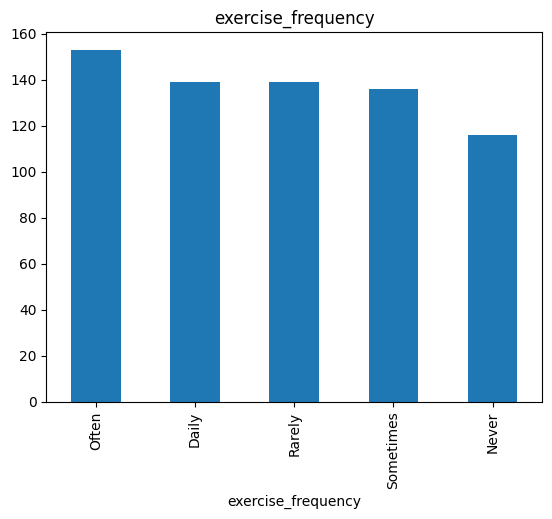

In [20]:
# Fitur exercise_frequency
feature = categorical_features[3]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa:
* Mayoritas pasien menunjukkan kebiasaan yang sehat dan aktif berolahraga, yaitu sebesar **42.8% pasien (Daily + Often)**.
* Disisi lain, **20.4% pasien** jarang melakukan olahraga, **19.9% pasien** terkadang masih melakukan olahraga, dan sisanya **17% pasien** tidak pernah melakukan aktifitas olahraga.


                           jumlah sampel  persentase
meditation_or_mindfulness                           
Yes                                  344        50.4
No                                   339        49.6


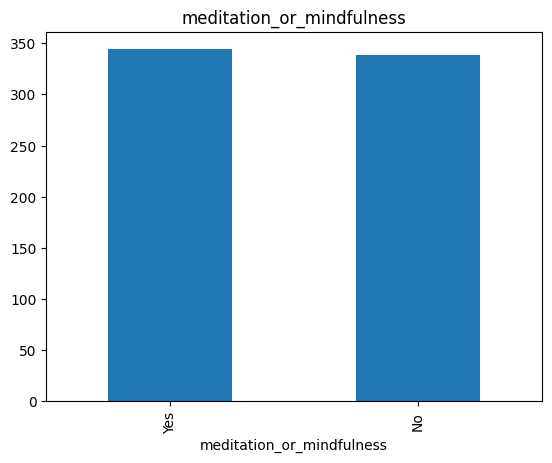

In [21]:
# Fitur meditation_or_mindfulness
feature = categorical_features[4]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa **50.4% pasien** melakukan praktek kesadaran diri/meditasi dan sisanya tidak melakukan praktek tersebut.

            jumlah sampel  persentase
diagnosis                            
Depression            275        40.3
ME/CFS                265        38.8
Both                  143        20.9


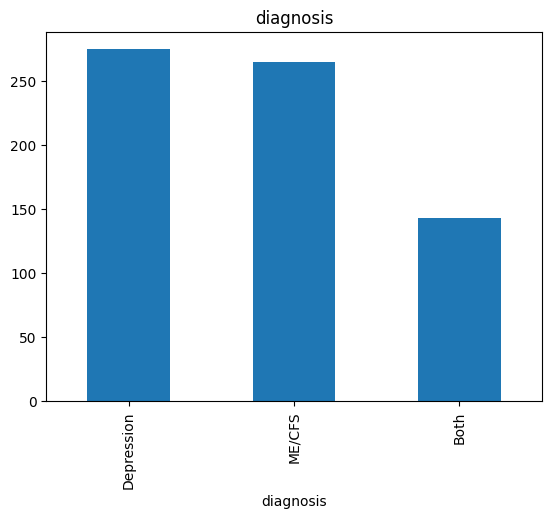

In [22]:
# Fitur diagnosis
feature = categorical_features[5]
count = dataset_clean[feature].value_counts()
percent = 100 * dataset_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan output tersebut, diketahui bahwa:
* Terdapat **40.3% pasien** yang didiagnosa **depression**.
* Terdapat **38.8% pasien** yang didiagnosa **ME/CFS**.
* dan sisanya, **didiagnosa keduanya**.

* **Numerical Features**

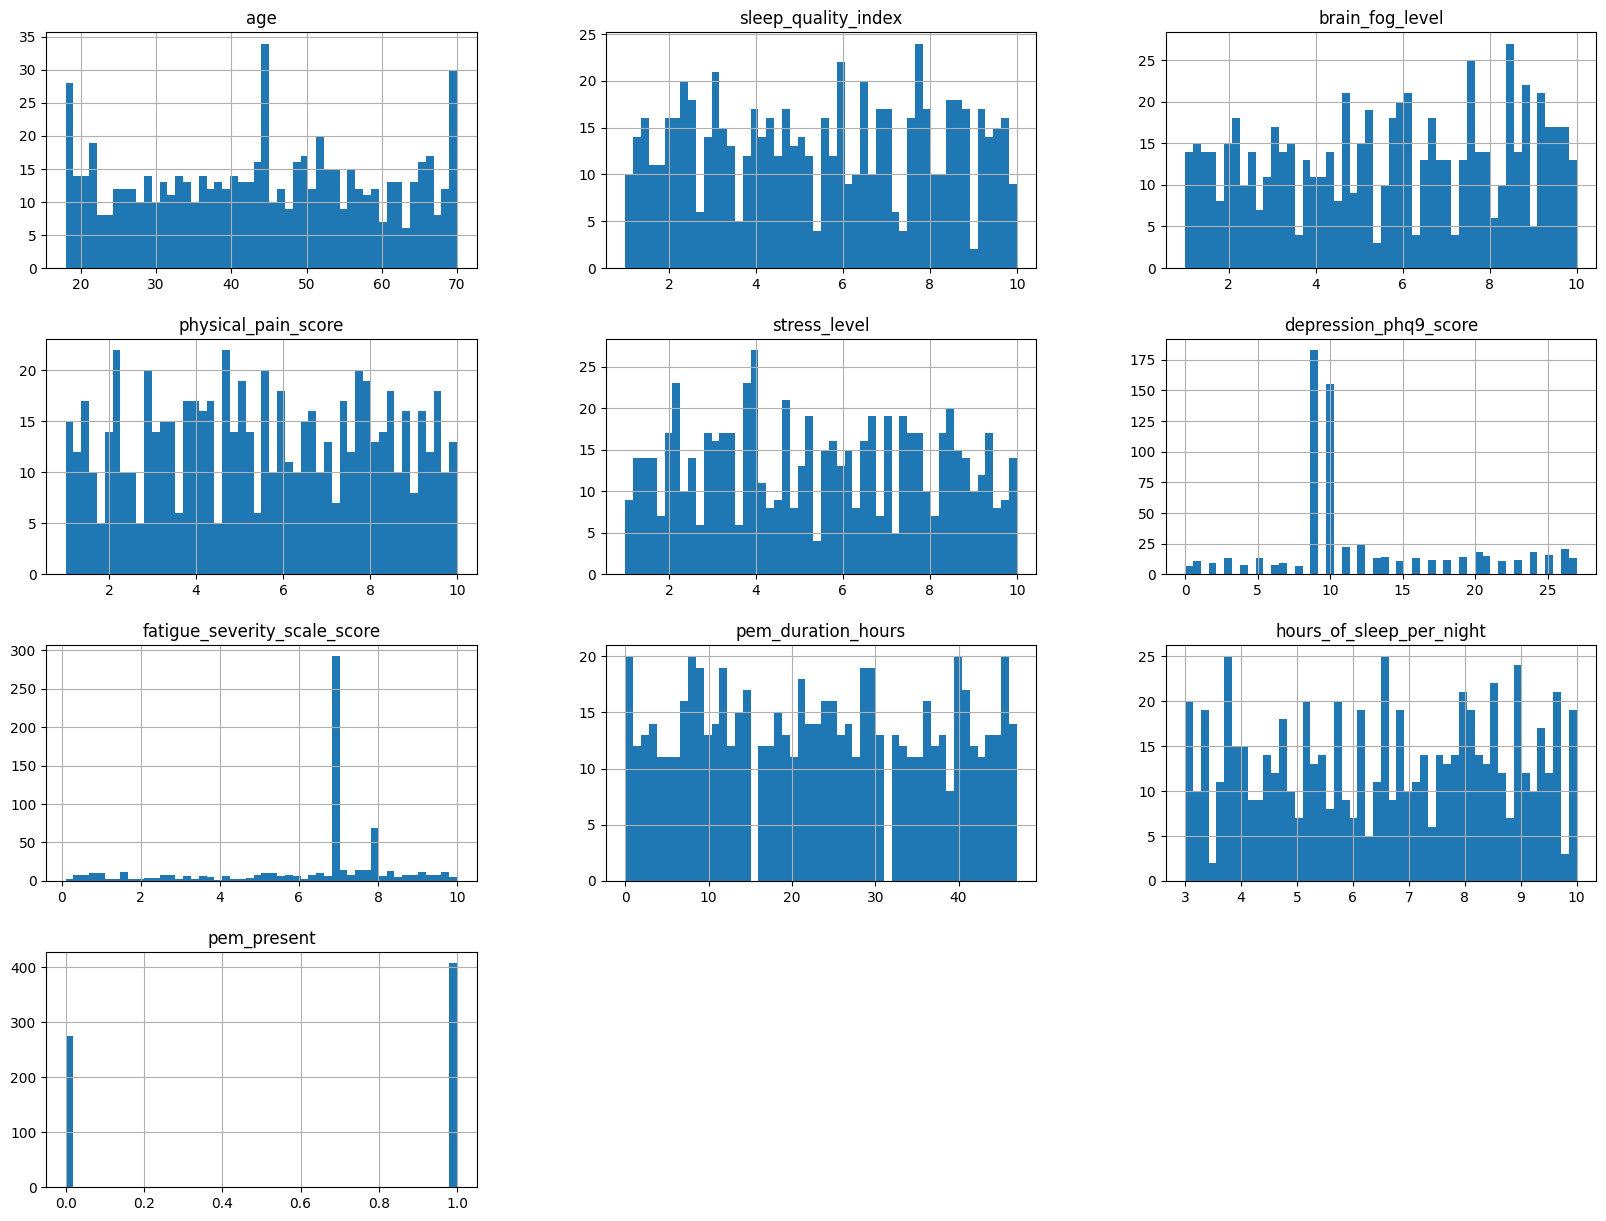

In [23]:
# Melihat histogram dari masing-masing fitur numerik
dataset_clean.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan output tersebut, diketahui:
* Pola usia bervariasi, dengan puncak sekitar usia 20, 40, dan 70 tahun.
* Fitur sleep_quality_index dan brain_fog_level memiliki nilai yang tersebar merata antara 0–10, menandakan variasi yang luas dalam kualitas tidur dan kejernihan kognitif.
* Distribusi dari fitur physical_pain_score dan stress_level relatif seimbang, tapi ada konsentrasi ringan di rentang tengah hingga tinggi, mengindikasikan kelelahan fisik dan tekanan emosional cukup umum.
* Fitur depression_phq9_score menunjukkan lonjakan jelas di sekitar skor 10.
* Fitur fatigue_severity_scale_score didominasi nilai tinggi, terutama di angka 7 yang menandakan sebagian besar individu mengalami kelelahan cukup parah.
* Durasi Post-Exertional Malaise (PEM) bervariasi luas tanpa pola puncak tertentu.
* Jam tidur per malam terdistribusi cukup merata dari 3 hingga 10 jam, mengindikasikan pola tidur yang tidak seragam.
* Mayoritas individu mengalami PEM (nilai 1).

### **Multivariate Analysis**

* **Numerical Features**

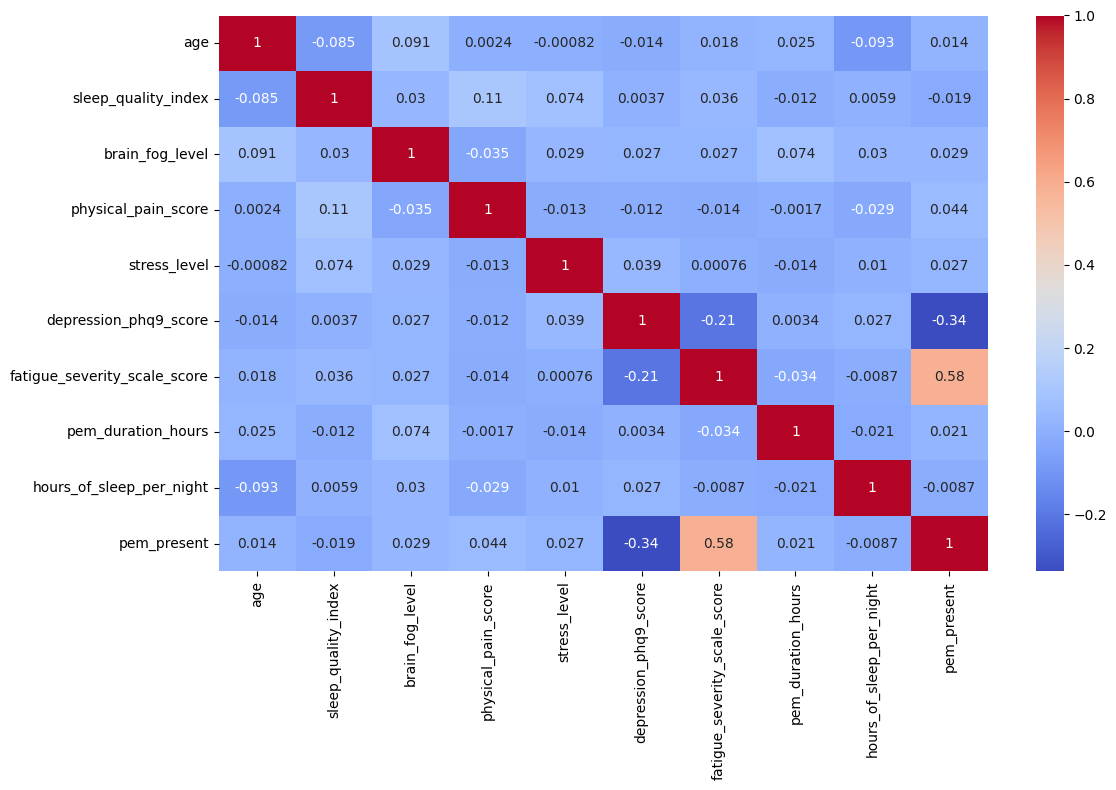

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset_clean[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

Berdasarkan output tersebut, diketahui:
* Mayoritas fitur numerik dalam dataset tidak memiliki hubungan linear yang kuat satu sama lain (r < 0.3). Hal ini mengindikasikan bahwa setiap fitur mungkin menyumbang informasi unik terhadap model tanpa tumpang tindih signifikan.
* Korelasi Pearson antara sleep_quality_index dan physical_pain_score sebesar 0.11, menunjukkan adanya hubungan linear yang sangat lemah. Jika sleep_quality_index meningkat, physical_pain_score cenderung meningkat sedikit juga, tapi hubungan ini sangat lemah.
* Nilai korelasi antara pem_present dan depression_phq9_score adalah –0.34, yang menunjukkan hubungan negatif lemah hingga sedang secara linear. Hal ini berarti, semakin tinggi kemungkinan seseorang mengalami PEM (Post-Exertional Malaise), cenderung semakin rendah skor depresi PHQ-9-nya, dan begitu juga sebaliknya.
* Korelasi antara fatigue_severity_scale_score dan pem_present sebesar 0.58, yang menunjukkan hubungan moderat hingga kuat secara linear. Hal ini berarti semakin tinggi tingkat kelelahan seseorang, maka semakin besar kemungkinan seseorang tersebut mengalami PEM.


* **Categorical Features**

<Axes: >

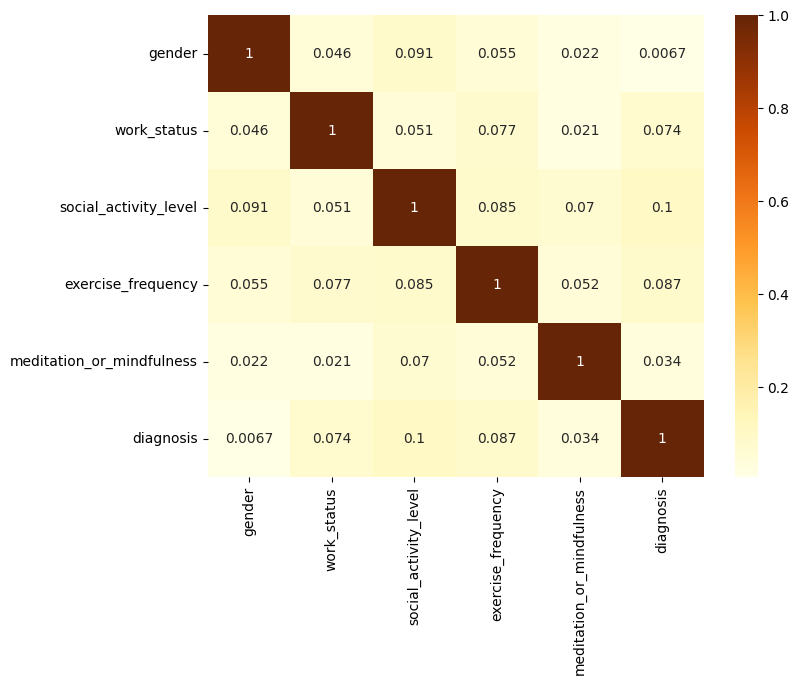

In [25]:
def cramers_v_matrix(df_cat):
    cols = df_cat.columns
    matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)
    for col1 in cols:
        for col2 in cols:
            confusion = pd.crosstab(df_cat[col1], df_cat[col2])
            chi2 = chi2_contingency(confusion)[0]
            n = confusion.sum().sum()
            phi2 = chi2 / n
            r, k = confusion.shape
            matrix.loc[col1, col2] = np.sqrt(phi2 / min(k-1, r-1))
    return matrix

cramer_matrix = cramers_v_matrix(dataset_clean[categorical_features])

plt.figure(figsize=(8,6))
sns.heatmap(cramer_matrix, annot=True, cmap="YlOrBr")

Berdasarkan output di atas, diketahui:
- Mayoritas nilai Cramér's V berada di bawah 0.1, yang mengindikasikan bahwa hubungan antar variabel kategorikal dalam dataset ini sangat lemah atau hampir tidak ada.
- Pasangan dengan asosiasi tertinggi adalah:
  - social_activity_level dan diagnosis: 0.10
  - exercise_frequency dan diagnosis: 0.087
  - social_activity_level dan exercise_frequency: 0.085
- Variabel gender dan diagnosis memiliki nilai Cramér's V terendah (0.0067), menunjukkan tidak ada asosiasi yang berarti antara jenis kelamin dan diagnosis dalam data ini.


In [26]:
# Menghapus fitur gender dan meditation_or_mindfulness yang memiliki korelasi yang sangat kecil dengan diagnosis
dataset_clean.drop(['gender', 'meditation_or_mindfulness'], inplace=True, axis=1)
dataset_clean.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,diagnosis
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Depression
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Both
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Depression
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,Both
5,25,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,Partially working,Medium,Never,ME/CFS


### **Data Preparation**

In [27]:
# Mengubah fitur kategori menjadi fitur numerik
# dataset_clean['gender'] = dataset_clean['gender'].map({'Female': 1, 'Male': 0})
# dataset_clean['meditation_or_mindfulness'] = dataset_clean['meditation_or_mindfulness'].map({'Yes': 1, 'No': 0})
dataset_clean = pd.concat([dataset_clean, pd.get_dummies(dataset_clean['work_status'], prefix='work_status').astype(int)],axis=1)
dataset_clean = pd.concat([dataset_clean, pd.get_dummies(dataset_clean['social_activity_level'], prefix='social_activity_level').astype(int)],axis=1)
dataset_clean = pd.concat([dataset_clean, pd.get_dummies(dataset_clean['exercise_frequency'], prefix='exercise_frequency').astype(int)],axis=1)

# Menghapus kolom work_status hingga kolom exercise_frequency
dataset_clean.drop(['work_status','social_activity_level','exercise_frequency'], axis=1, inplace=True)
dataset_clean.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,social_activity_level_High,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Daily,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,...,0,1,0,0,0,1,0,0,0,0
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,...,0,1,0,0,0,0,0,1,0,0
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,...,1,0,0,0,0,0,1,0,0,0
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,...,0,1,0,0,0,0,0,0,1,0
5,25,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,...,0,0,1,0,0,0,1,0,0,0


### **Train-Test-Split**

In [28]:
# Mengubah fitur diagnosis menjadi fitur numerik
le = LabelEncoder()
dataset_clean['diagnosis_encoded'] = le.fit_transform(dataset_clean['diagnosis'])
dataset_clean.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Daily,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes,diagnosis_encoded
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,...,1,0,0,0,1,0,0,0,0,1
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,...,1,0,0,0,0,0,1,0,0,0
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,...,0,0,0,0,0,1,0,0,0,1
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,...,1,0,0,0,0,0,0,1,0,0
5,25,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,...,0,1,0,0,0,1,0,0,0,2


In [29]:
X = dataset_clean.drop(["diagnosis", "diagnosis_encoded"],axis =1)
y = dataset_clean["diagnosis_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              683 non-null    int64  
 1   sleep_quality_index              683 non-null    float64
 2   brain_fog_level                  683 non-null    float64
 3   physical_pain_score              683 non-null    float64
 4   stress_level                     683 non-null    float64
 5   depression_phq9_score            683 non-null    float64
 6   fatigue_severity_scale_score     683 non-null    float64
 7   pem_duration_hours               683 non-null    float64
 8   hours_of_sleep_per_night         683 non-null    float64
 9   pem_present                      683 non-null    int64  
 10  work_status_Not working          683 non-null    int64  
 11  work_status_Partially working    683 non-null    int64  
 12  work_status_Working        

<Axes: xlabel='diagnosis_encoded', ylabel='count'>

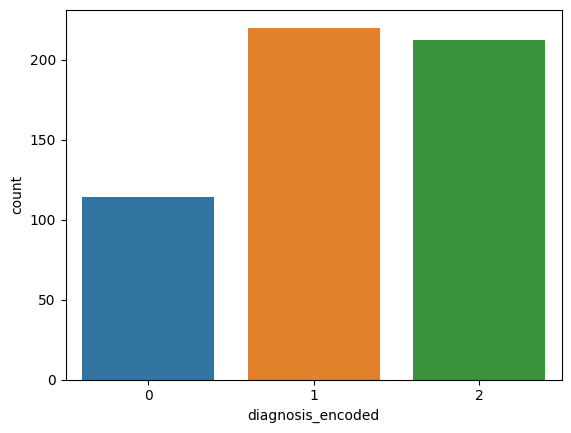

In [31]:
# Visualisasi untuk melihat distribusi label pada data pelatihan
sns.countplot(x=y_train)

In [32]:
# Menerapkan SMOTE pada data pelatihan
smote = SMOTE(sampling_strategy={0: 200}, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Distribusi label setelah SMOTE:", Counter(y_train))

Distribusi label setelah SMOTE: Counter({1: 220, 2: 212, 0: 200})


Dalam penanganan imbalanced dataset, ukuran kelas minoritas (kelas both (0)) tidak disamakan dengan kelas mayoritas. Hal ini bertujuan untuk meningkatkan representasi kelas minoritas tanpa menciptakan distorsi distribusi yang tidak realistis, sehingga proporsi data tetap mendekati kondisi dunia nyata dan model dapat belajar dari data yang lebih seimbang namun tetap mencerminkan kompleksitas sebenarnya dari populasi klinis.

### **Standarisasi**

In [33]:
# Memisahkan fitur pem_present dengan fitur numerik lainnya
binary_cols = ['pem_present']
scale_cols = [col for col in X_train[numerical_features] if col not in binary_cols]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
scaled_array = scaler.fit_transform(X_train[scale_cols])
scaled_df = pd.DataFrame(scaled_array, columns=scale_cols, index=X_train.index)

# Menggabungkan kembali fitur pem_present dengan fitur numerik lainnya
X_final = pd.concat([scaled_df, X_train[binary_cols]], axis=1)
X_final.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
0,0.797372,-0.618917,1.399247,1.301572,-1.074958,-0.598035,0.242077,-0.444946,1.586310,1
1,0.465309,-1.572114,-0.115741,-0.559644,-1.034707,1.410709,0.708121,0.277236,-1.556329,0
2,0.797372,0.771162,-0.835360,0.905568,-0.873705,-1.679667,0.242077,1.071636,-0.359133,1
3,0.730959,-1.730980,1.361372,-1.193250,1.420569,1.719747,0.242077,-0.878255,1.386777,1
4,0.332483,-0.221752,-0.570238,-1.470452,-0.189448,-0.443516,-0.783220,-0.806037,0.788179,0


Standarisasi dilakukan pada semua fitur numerik kecuali fitur pem_present, mengingat fitur tersebut hanya terdiri dari dua nilai, yaitu 0 dan 1. Hal ini dilakukan agar makna yang terkandung dalam fitur tersebut tetap terjaga, serta agar model klasifikasi dapat menginterpretasikannya secara eksplisit tanpa menyamarkannya dalam skala numerik yang tidak relevan. 

In [34]:
X_final.describe().round(4)

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,632.0000,632.0000,632.0000,632.0000,632.0000,632.0000,632.0000,632.0000,632.0000,632.0000
mean,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.6519
std,1.0008,1.0008,1.0008,1.0008,1.0008,1.0008,1.0008,1.0008,1.0008,0.4767
min,-1.7263,-1.8104,-1.7444,-1.7873,-1.8397,-1.9887,-2.9736,-1.6727,-1.7559,0.0000
25%,-0.8629,-0.8969,-0.8732,-0.8009,-0.8335,-0.5980,0.1372,-0.8783,-0.8279,0.0000
50%,0.0668,-0.0019,0.0547,-0.0372,-0.0282,-0.4435,0.2421,-0.0116,-0.0100,1.0000
75%,0.7974,0.8605,0.8700,0.9038,0.8168,0.7926,0.4834,0.8550,0.8381,1.0000
max,1.7271,1.7641,1.6644,1.7768,1.7828,2.1833,1.6402,1.7216,1.7360,1.0000


Berdasarkan output di atas, diketahui bahwa standarisasi telah berhasil dilakukan, terlihat dari nilai mean=0 dan standar deviasi=1 untuk semua fitur numerik kecuali fitur pem_present.

In [35]:
# Mendeteksi kolom kategorikal hasil one-hot encoding
categorical_cols = [col for col in X_train.columns if col not in set(scale_cols + binary_cols)]
encoded_cats = X_train[categorical_cols]

# Menggabungkan numerik yang sudah distandarisasi + fitur kategorikal
X_train_final = pd.concat([X_final, encoded_cats], axis=1)
X_train_final.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,social_activity_level_High,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Daily,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes
0,0.797372,-0.618917,1.399247,1.301572,-1.074958,-0.598035,0.242077,-0.444946,1.586310,1,...,0,1,0,0,0,0,0,0,1,0
1,0.465309,-1.572114,-0.115741,-0.559644,-1.034707,1.410709,0.708121,0.277236,-1.556329,0,...,1,0,0,0,0,0,1,0,0,0
2,0.797372,0.771162,-0.835360,0.905568,-0.873705,-1.679667,0.242077,1.071636,-0.359133,1,...,0,0,0,1,0,0,0,0,0,1
3,0.730959,-1.730980,1.361372,-1.193250,1.420569,1.719747,0.242077,-0.878255,1.386777,1,...,0,0,1,0,0,0,0,1,0,0
4,0.332483,-0.221752,-0.570238,-1.470452,-0.189448,-0.443516,-0.783220,-0.806037,0.788179,0,...,0,0,0,0,1,1,0,0,0,0


### **Model Development**

* **K-nearest neighbors (KNN)**

In [36]:
# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=5)

# Train model
knn.fit(X_train_final, y_train)

# Prediksi
y_pred_train_knn = knn.predict(X_train_final)

# Evaluasi akurasi model XGBoost
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)

# Menampilkan akurasi
print('KNN - accuracy_train:', accuracy_train_knn)

KNN - accuracy_train: 0.8132911392405063


* **AdaBoost**

In [37]:
# X_train_final = X_train_final[boosting.feature_names_in_]

# Inisialisasi model
boosting = AdaBoostClassifier(    
    n_estimators=50,
    algorithm='SAMME.R',
    random_state=42)

# Train model
boosting.fit(X_train, y_train)

# Prediksi
y_pred_train_boosting = boosting.predict(X_train_final)

# Evaluasi akurasi model AdaBoost
accuracy_train_boosting = accuracy_score(y_train, y_pred_train_boosting)

# Menampilkan akurasi
print('AdaBoost - accuracy_train:', accuracy_train_boosting)

AdaBoost - accuracy_train: 0.6835443037974683


* **Random Forest**

In [38]:
# Inisialisasi model
RF = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=9, random_state=44)

# Train model
RF.fit(X_train_final, y_train)

# Prediksi
y_pred_train_rf = RF.predict(X_train_final)

# Evaluasi akurasi model XGBoost
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)

importances = pd.Series(RF.feature_importances_, index=X_train_final.columns).sort_values(ascending=False)
importances

Random Forest - accuracy_train: 1.0


depression_phq9_score              0.366078
pem_present                        0.298383
fatigue_severity_scale_score       0.143838
sleep_quality_index                0.021172
brain_fog_level                    0.018967
hours_of_sleep_per_night           0.018342
pem_duration_hours                 0.018219
age                                0.017894
stress_level                       0.017277
physical_pain_score                0.016142
exercise_frequency_Never           0.009934
work_status_Partially working      0.008232
work_status_Working                0.007694
social_activity_level_Medium       0.005759
exercise_frequency_Daily           0.005385
social_activity_level_High         0.005302
social_activity_level_Low          0.004053
exercise_frequency_Rarely          0.003789
social_activity_level_Very low     0.003431
work_status_Not working            0.002775
exercise_frequency_Sometimes       0.002496
exercise_frequency_Often           0.002465
social_activity_level_Very high 

* **XGBoost**

XGBoost - accuracy_train: 1.0


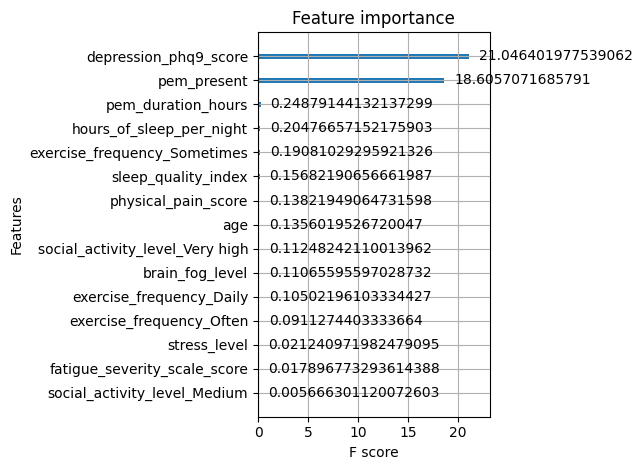

In [39]:
import xgboost as xgb

# Inisialisasi model
XGBoost = xgb.XGBClassifier(objective="multi:softprob", eval_metric="mlogloss", n_estimators=100,
                         learning_rate=0.1, reg_alpha=0.5, reg_lambda=0.5)

# Train model
XGBoost.fit(X_train_final, y_train)

# Prediksi
y_pred_train_xgb = XGBoost.predict(X_train_final)

# Evaluasi akurasi model XGBoost
accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)

# Menampilkan akurasi
print('XGBoost - accuracy_train:', accuracy_train_xgb)

# Plot importance
xgb.plot_importance(XGBoost, importance_type='gain')  # mengetahui rata-rata peningkatan akurasi ketika fitur digunakan
plt.tight_layout()
plt.show()

### **Evaluasi Model**

In [40]:
# Transformasi data test menggunakan scaler dari training
scaled_array_test = scaler.transform(X_test[scale_cols])
scaled_df_test = pd.DataFrame(scaled_array_test, columns=scale_cols, index=X_test.index)

# Gabungkan kembali dengan kolom biner
X_test_final = pd.concat([scaled_df_test, X_test[binary_cols]], axis=1)
X_test_final.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
4,1.063022,0.810878,0.717502,0.351163,1.179066,0.638115,0.242077,1.649381,-1.705979,1
921,1.594323,1.684642,1.588621,0.945169,-0.632203,-0.598035,1.034352,0.060581,1.087478,1
603,1.594323,0.652012,-1.214107,-0.163641,-1.477462,1.256190,0.708121,-0.083855,-1.157264,0
54,-1.195007,1.128610,-1.479230,1.578774,1.380318,1.565228,0.708121,-0.517164,-1.207147,0
652,0.930197,-1.452964,0.111507,-1.747654,-1.759215,-0.288998,0.009055,-0.228291,0.788179,0


In [41]:
encoded_cols_test = X_test[categorical_cols]

# Reset index untuk memastikan tidak ada duplikat atau inkonsistensi
X_test_final = X_test_final.reset_index(drop=True)
encoded_cats = encoded_cols_test.reset_index(drop=True)

# Gabungkan numerik yang sudah distandarisasi + fitur kategorikal
X_test_final = pd.concat([X_test_final, encoded_cats], axis=1)
X_test_final.head()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,...,social_activity_level_High,social_activity_level_Low,social_activity_level_Medium,social_activity_level_Very high,social_activity_level_Very low,exercise_frequency_Daily,exercise_frequency_Never,exercise_frequency_Often,exercise_frequency_Rarely,exercise_frequency_Sometimes
0,1.063022,0.810878,0.717502,0.351163,1.179066,0.638115,0.242077,1.649381,-1.705979,1,...,0,1,0,0,0,0,0,0,1,0
1,1.594323,1.684642,1.588621,0.945169,-0.632203,-0.598035,1.034352,0.060581,1.087478,1,...,0,0,0,1,0,0,0,1,0,0
2,1.594323,0.652012,-1.214107,-0.163641,-1.477462,1.256190,0.708121,-0.083855,-1.157264,0,...,0,0,0,1,0,0,0,1,0,0
3,-1.195007,1.128610,-1.479230,1.578774,1.380318,1.565228,0.708121,-0.517164,-1.207147,0,...,0,1,0,0,0,1,0,0,0,0
4,0.930197,-1.452964,0.111507,-1.747654,-1.759215,-0.288998,0.009055,-0.228291,0.788179,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
# Evaluasi KNN
y_pred_knn = knn.predict(X_test_final)
print("KNN Performance:")
print(classification_report(y_test, y_pred_knn))

KNN Performance:
              precision    recall  f1-score   support

           0       0.35      0.83      0.49        29
           1       0.97      0.58      0.73        55
           2       0.81      0.55      0.65        53

    accuracy                           0.62       137
   macro avg       0.71      0.65      0.62       137
weighted avg       0.78      0.62      0.65       137



In [43]:
# X_test_final = X_test_final[boosting.feature_names_in_]

# Evaluasi AdaBoost
y_pred_boosting = boosting.predict(X_test_final)
print("AdaBoost Performance:")
print(classification_report(y_test, y_pred_boosting))

AdaBoost Performance:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       1.00      1.00      1.00        55
           2       0.65      1.00      0.79        53

    accuracy                           0.79       137
   macro avg       0.55      0.67      0.60       137
weighted avg       0.65      0.79      0.71       137



In [44]:
# Evaluasi Random Forest
y_pred_rf = RF.predict(X_test_final)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [45]:
# Evaluasi XGBoost
y_pred_xgb = XGBoost.predict(X_test_final)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        53

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [46]:
# Evaluasi Random Forest
print("\nEvaluasi Random Forest:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

# Evaluasi XGBoost
print("\nEvaluasi XGBoost:")
print(f"Akurasi: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred_xgb, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb, average='macro'):.4f}")


Evaluasi Random Forest:
Akurasi: 1.0000
Presisi: 1.0000
Recall: 1.0000
F1-Score: 1.0000

Evaluasi XGBoost:
Akurasi: 1.0000
Presisi: 1.0000
Recall: 1.0000
F1-Score: 1.0000


In [47]:
# Mengacak fitur tertentu untuk menguji sensitivitas model
X_train_shuffled = np.random.permutation(X_train_final)
XGBoost.fit(X_train_shuffled, y_train)
print(f"Akurasi XGBoost dengan Fitur Acak: {XGBoost.score(X_test_final, y_test):.4f}")

RF.fit(X_train_shuffled, y_train)
print(f"Akurasi Random Forest dengan Fitur Acak: {RF.score(X_test_final, y_test):.4f}")

Akurasi XGBoost dengan Fitur Acak: 0.3431
Akurasi Random Forest dengan Fitur Acak: 0.3504


Jika dilihat dari output di atas, diketahui bahwa hasil evaluasi untuk algoritma Random Forest dan XGBoost adalah 1.00. 
Namun, setelah fitur diacak, akurasi model mengalami penurunan secara drastis. Hal ini mengindikasikan bahwa fitur tersebut sebelumnya memiliki kontribusi prediktif yang signifikan. Jika terjadi data leakage, model justru akan menunjukkan performa yang terlalu tinggi secara tidak wajar, bukan mengalami degradasi performa ekstrem saat fitur diganggu. Oleh karena itu, kemungkinan besar hasil evaluasi yang sempurna ini bukan disebabkan oleh data leakage.